$ \textbf{1. (3 балла)}$ Еще раз из предыдущего домашнего задания: оцените линейную модель, которая объясняет заработную плату ($wage$) возрастом ($age$), наличием высшего образования ($high$), полом ($female$), наличием детей ($is\_children$), курением ($smoke$) и константой. Проинтерпретируйте полученные результаты. Все ли коэффициенты оказались значимы? Выпишите уравнение оцененной модели.

In [831]:
import pandas as pd #сделаем все шаги подготовки данных для регрессии как в прошлом дз 
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sisi
import numpy as np
df_hw = pd.read_csv('Homework_2_data.csv', sep=';')
year = 2023
industry = 'СЕЛЬСКОЕ ХОЗЯЙСТВО'
region = 'все'
if industry == 'все':
    my_data = (df_hw[(df_hw.year == year) & (df_hw.region == region)])
elif region == 'все':
    my_data = (df_hw[(df_hw.year == year) &
    (df_hw. industry == industry )])
my_data
data = pl.from_pandas(my_data) #эт только чтоб заменить потому что мне лень прошлый код переписывать 
true_data = data.with_columns(pl.col('age').str.replace(',', '.'), 
                                                     pl.col('wage').str.replace(',', '.'), 
                                                     pl.col('weight').str.replace(',', '.'), 
                                                     pl.col('height').str.replace(',', '.')
                                                     ).with_columns(
                                                         pl.col('age').cast(pl.Float64),
                                                        pl.col('wage').cast(pl.Float64), 
                                                        pl.col('weight').cast(pl.Float64),
                                                        pl.col('height').cast(pl.Float64))
true_data.insert_column(0, true_data['is_children'].alias('constant')).drop('is_children') #Превратим столбец is_children в константу потому что все чуваки с детьми
regression1_data = true_data.select('constant', 'wage', 'educ', 'age', 'female', 'smoke')
regression1_data = regression1_data.with_columns(pl.when(pl.col('educ') == 2).then(1).otherwise(0).alias('high')).drop('educ')
y = regression1_data['wage'].to_pandas()
X = regression1_data.drop('wage').to_pandas()

In [832]:
import statsmodels.api as sm # type: ignore
model1 = sm.OLS(y, X).fit()
print(model1.summary())
print(f'Уравнение модели: wage = {model1.params['constant']:0.3f} - {abs(model1.params['age']):0.3f} * age - {abs(model1.params['female']):0.3f} * female - {abs(model1.params['smoke']):0.3f} * smoke + {abs(model1.params['high']):0.3f} * high')

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.052
Date:                Sun, 15 Dec 2024   Prob (F-statistic):             0.0192
Time:                        19:09:54   Log-Likelihood:                -1562.6
No. Observations:                 136   AIC:                             3135.
Df Residuals:                     131   BIC:                             3150.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    6.859e+04   1.15e+04      5.982      0.0

Выводы те же, что и в прошлом дз

$\textbf{2. (3 балла)}$ Оцените полулогарифмическую модель, которая объясняет логарифм заработной платы ($\ln(wage)$) возрастом ($age$), наличием высшего образования ($high$), полом ($female$), наличием детей ($is\_children$), курением ($smoke$) и константой. Проинтерпретируйте полученные результаты. Все ли коэффициенты оказались значимы? Выпишите уравнение оцененной модели.

In [833]:
model2 = sm.OLS(np.log(y), X).fit()
print(model2.summary())
print(f'Уравнение модели: ln(wage) = {model2.params['constant']:0.3f} - {abs(model2.params['age']):0.3f} * age - {abs(model2.params['female']):0.3f} * female + {abs(model2.params['smoke']):0.3f} * smoke + {abs(model2.params['high']):0.3f} * high')

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     6.361
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           0.000104
Time:                        19:09:54   Log-Likelihood:                -86.136
No. Observations:                 136   AIC:                             182.3
Df Residuals:                     131   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      11.1960      0.221     50.643      0.0


Снова не все коэффициенты получились значимыми, у high и smoke высокие p-value (0.191 и 0.946 соответственно) $\Rightarrow$ мы не отвергаем для них гипотезу о незначимости $H_0$. Для остальных же говорим, что коэффициенты значимы (точнее не отвергаем гипотезу $H_1$). Стоит отметить, что теперь коэффициент при smoke намного более незначим по сравнению с high, что было наоборот в обычной модели регресиси. 

$\textbf{3. (3 балла)}$ Оцените линейную в логарифмах модель, которая объясняет логарифм заработной платы ($\ln(wage)$) логарифмом возраста ($ln(age)$), наличием высшего образования ($high$), полом ($female$), наличием детей ($is\_children$), курением ($smoke$) и константой. Проинтерпретируйте полученные результаты. Все ли коэффициенты оказались значимы? Выпишите уравнение оцененной модели.

In [834]:
X['log_age'] = np.log(X['age'])
model3 = sm.OLS(np.log(y), X.drop(['age'], axis=1)).fit()
print(model3.summary())
print(f'Уравнение модели: ln(wage) = {model3.params['constant']:0.3f} - {abs(model3.params['log_age']):0.3f} * log_age - {abs(model3.params['female']):0.3f} * female + {abs(model3.params['smoke']):0.3f} * smoke + {abs(model3.params['high']):0.3f} * high')


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     5.583
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           0.000351
Time:                        19:09:54   Log-Likelihood:                -87.502
No. Observations:                 136   AIC:                             185.0
Df Residuals:                     131   BIC:                             199.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      13.1083      0.755     17.373      0.0

Снова те же коэффициенты  получились незначимыми. 


$\textbf{4. (4 балла)}$ Сделайте выбор между моделями из пунктов (1)--(3). Обоснуйте свой выбор.

По $R^2$ сразу откидываем третью модель

Воспользуемся тестом Бокса-Кокса с преобразованием Зарембеки.

In [835]:
from scipy.stats.mstats import gmean

X = X.drop(['log_age'], axis=1)

y_mean_g = gmean(y)
y_norm = y / y_mean_g
y_norm

#оценим две вспомогательные регрессии 

model_help_1 = sm.OLS(y_norm, X).fit()
model_help_2 = sm.OLS(np.log(y_norm), X).fit()
rss1 = model_help_1.ssr
rss2 = model_help_2.ssr
hi2 = X.shape[0] / 2 * np.abs(np.log(rss1 / rss2))
print(f'hi2 statistics: {hi2}')
print(f'linear rss: {rss1}')
print(f'log_rss: {rss2}')

hi2 statistics: 71.66255729576477
linear rss: 81.07286411157091
log_rss: 28.261124580687003


Таким образом выбираем вторую модель 

$\textbf{5. (6 баллов)} $ Для выбранной модели из пункта (4) протестируйте есть ли различия в моделях заработных плат для мужчин и женщин? Протестируйте двумя способами (с помощью дамми переменных и теста Чоу).$

In [836]:
from scipy.stats import f

model = model2
RSSp = model.ssr
Xfemale = X[X['female'] == 1]
yfemale = np.log(y[Xfemale.index])
Xmale = X[np.logical_not(X['female'] == 1)]
ymale = np.log(y[Xmale.index])
RSS1 = sm.OLS(yfemale, Xfemale).fit().ssr
RSS2 = sm.OLS(ymale, Xmale).fit().ssr

n, k = X.shape
F = ((RSSp - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (n - 2 * k)) #значение тестовой статистики 
p_value = 1 - f.cdf(F, k, n - 2 * k)
print(f'f-statistics: {F}')
print(f'p_value: {p_value:0.03f}')

f-statistics: 0.6014507431110386
p_value: 0.699


Тест Чоу говорит, что нет различий на любом разумном уровне значимости 

In [837]:
DummyX = X.copy()
for column in ['constant', 'age', 'high', 'smoke']:
    DummyX[f'{column}_fem'] = X[column] * X['female']
DummyX['male'] = (X['female'] + 1) % 2
for column in ['constant', 'age', 'high', 'smoke']:
    DummyX[column] = DummyX[column] * DummyX['male']
DummyRSS = sm.OLS(np.log(y), DummyX).fit().ssr
F = ((RSSp - DummyRSS) / k) / (DummyRSS / (n - 2 * k))
p_value = 1 - f.cdf(F, k, n - 2 * k)
print(f'f-statistics: {F:.03}')
print(f'p_value: {p_value:0.03f}')

f-statistics: 0.601
p_value: 0.699


Дамми тест тоже сказал что различий нет 

$\textbf{6. (6 баллов)}$ Для выбранной модели из пункта (4) протестируйте наличие выбросов в вашей модели. Используйте несколько критериев.

In [838]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
dffits = influence.dffits[0] 

n = len(X)    
p = X.shape[1]     

critical_value = 2 * np.sqrt(p / n)

X['standardized_residuals'] = standardized_residuals
X['DFFITS'] = dffits
outliers = X[(abs(standardized_residuals) > 2) | (abs(dffits) > critical_value)]
pd.concat([np.log(y[outliers.index]), outliers], axis=1).rename(columns={'wage': 'log_wage'})

,log_wage,constant,age,female,smoke,high,standardized_residuals,DFFITS
12,9.341369,1,60.5,1,0,1,-1.611857,-0.455513
56,11.608236,1,53.5,0,0,0,2.908079,0.475400
64,11.289782,1,50.0,0,0,0,2.080900,0.324538
71,9.210340,1,56.0,0,0,0,-2.227871,-0.375772
85,12.429216,1,45.5,0,0,0,4.396759,0.749224
118,9.058470,1,28.5,1,0,0,-3.123766,-0.749249


In [839]:
critical_value
X = X.drop(['standardized_residuals', 'DFFITS'], axis=1)

$\textbf{7. (6 баллов)}$ Для выбранной модели из пункта (4) протестируйте наличие мультиколлинеарности несколькими способами. Сделайте вывод. Примите меры, если мультиколлинеарность обнаружена. 

In [840]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])
]
vif_data

,Feature,VIF
0,constant,30.810506
1,age,1.037137
2,female,1.138361
3,smoke,1.201119
4,high,1.061819


Как видим, VIF для признаков не превышает даже пяти, поэтому нет оснований говорить про наличие мультиколлинеарности 

In [841]:
corr_matrix = X.drop(['constant'], axis=1).corr()
corr_matrix

,age,female,smoke,high
age,1.000000,-0.083695,-0.103164,-0.073246
female,-0.083695,1.000000,-0.327793,0.072376
smoke,-0.103164,-0.327793,1.000000,-0.220799
high,-0.073246,0.072376,-0.220799,1.000000


Корреляционная матрица тоже не показала наличия мультиколлинеарности, так как максимальная корреляция по модулю около 0,3

$\textbf{8. (6 баллов)}$ Уместно ли применять в рассматриваемой модели метод главных компонент (МГК)? Для каких задач используется данный метод? Обсудите возможные проблемы, которые могут здесь возникнуть. Если это возможно, продемонстрируйте применение МГК для ваших данных. Проинтерпретируйте результаты.

МГК применяется обычно например для задачи снижения размерности, или например для исправления проблемы мультиколлинеарности. Кажется, что в нашем случае, когда есть всего 4 фактора, три из которых бинарные, а также в отсутствии мультиколлинеарности МГК применять нет особого смысла. К проблемам можно отнести потерю интерпретируемости, неправильное представление МГК о распределении неправильных переменных, так как МГК лучше справляется с непрерывными переменными.

In [842]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#для начала отнормируем
X_noconst = X.drop(['constant'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noconst)
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=['age', 'female', 'smoke', 'high'], index=['PC1', 'PC2', 'PC3', 'PC4'])
explained_variance = pca.explained_variance_ratio_
print(f'Доля объясненной дисперсии 1 главная компонента: {explained_variance[0]:.2f}')
print(f'Доля объясненной дисперсии 2 главная компонента: {explained_variance[1]:.2f}')
print(f'Доля объясненной дисперсии 3 главная компонента: {explained_variance[2]:.2f}')
print(f'Доля объясненной дисперсии 4 главная компонента: {explained_variance[3]:.2f}')

Доля объясненной дисперсии 1 главная компонента: 0.36
Доля объясненной дисперсии 2 главная компонента: 0.26
Доля объясненной дисперсии 3 главная компонента: 0.23
Доля объясненной дисперсии 4 главная компонента: 0.15


In [843]:
loadings_df

,age,female,smoke,high
PC1,0.030188,-0.590663,0.670738,-0.447568
PC2,0.928027,-0.084764,-0.274581,-0.237035
PC3,0.153918,-0.583156,0.011730,0.797560
PC4,0.337881,0.551237,0.688897,0.327713


Получается, что первая компонента отвечаает за курящих мужчин со средним образованием. Вторая берет на себя возраст. Третья сильнее всего коррелирует с мужчинами с высоким образованием, а четвертая главным образом отвечает за женщин и курение, но также объясняет возраст и высокое образование

$\textbf{9. (4 балла)}$ Для выбранной модели из пункта (4) постройте график «остатки---прогнозы». Сделайте вывод.

<Axes: title={'center': 'residuals-fitted values plot'}, xlabel='residuals', ylabel='fitted_values'>

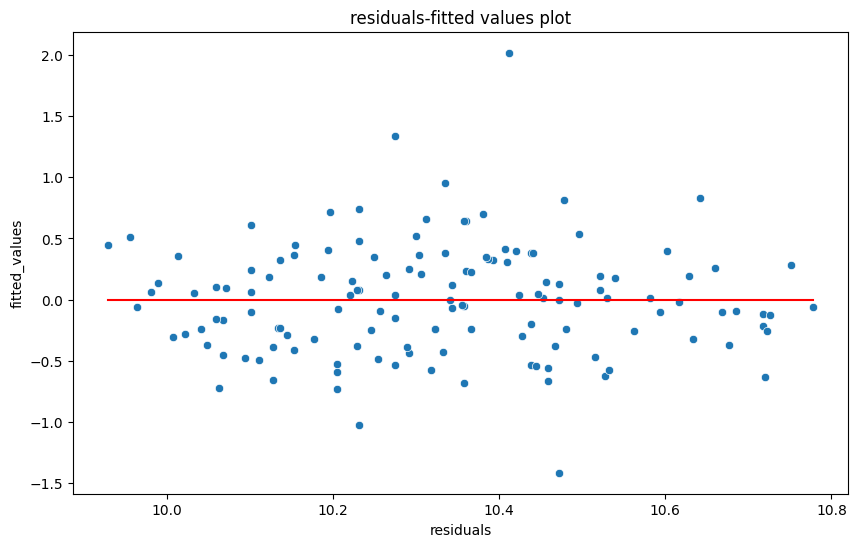

In [844]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
y_pred = model.predict()
residuals = model.resid
sns.scatterplot(x=y_pred, y=residuals, ax=ax).set(xlabel='residuals', ylabel='fitted_values', title='residuals-fitted values plot')
sns.lineplot(x=[min(y_pred), max(y_pred)], y=[0, 0], c='red')

$\textbf{10. (6 баллов)}$ Для выбранной модели из пункта (4) протестируйте наличие гетероскедастичности разными способами. Сделайте вывод. Примите меры, если гетероскедастичность обнаружена. 

Сделаем тест Бройша-Пагана

In [845]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = model.resid
breuschpagan_test = het_breuschpagan(residuals, X)
hi2 = breuschpagan_test[0]
p_val = breuschpagan_test[1]
p_val

0.2353068156063124

Тест Уайта

In [846]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, X)
hi2 = white_test[0]
p_val = white_test[1]
print(p_val)

0.5367958469164162


По тестам на любом адекватном уровне значимости  гетероскедастичность не обнаружена

$\textbf{11. (4 балла)}$ Для выбранной модели из пункта (4) проведите тест Рамсея с одним вспомогательным регрессором (только с квадратом). Сделайте вывод.

In [847]:
from statsmodels.stats.diagnostic import linear_reset
reset = linear_reset(res=model, power=2, test_type="fitted", use_f=True)
p_value = reset.pvalue
f = reset.fvalue
print(f'p-value({p_value:.3f})')
print(f'f-value({f:.3f})')
print(reset)

p-value(0.333)
f-value(0.944)
<F test: F=0.9437631152410967, p=0.3331160183328987, df_denom=130, df_num=1>


Получается что по результатам теста модель правильно специфицирована

$\textbf{12. (5 баллов)}$ Оцените модель из пункта (4), оставив в ней только значимые коэффициенты.  Выпишите уравнение оцененной модели. Сравните результаты с моделью из пункта (1). Какие критерии для сравнения моделей здесь стоит использовать?

In [848]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     6.361
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           0.000104
Time:                        19:09:55   Log-Likelihood:                -86.136
No. Observations:                 136   AIC:                             182.3
Df Residuals:                     131   BIC:                             196.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      11.1960      0.221     50.643      0.0

Оставляем только age и female

In [849]:
X_filtered = X.drop(['smoke', 'high'], axis=1)
model_filtered = sm.OLS(np.log(y), X_filtered).fit()
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     11.85
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.84e-05
Time:                        19:09:55   Log-Likelihood:                -87.054
No. Observations:                 136   AIC:                             180.1
Df Residuals:                     133   BIC:                             188.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      11.2408      0.204     55.024      0.0

Так как количество регрессоров разное и зависимая переменная в разных масштабах, то стандартные методы типа $R^2$ и информационных критериев не работают, можно попробовать убрать из первой модели незначимые факторы и сравнить их снова по тесту Бокса-Кокса например

In [850]:
model_help_1 = sm.OLS(y_norm, X_filtered).fit()
model_help_2 = sm.OLS(np.log(y_norm), X_filtered).fit()
rss1 = model_help_1.ssr
rss2 = model_help_2.ssr
hi2 = X.shape[0] / 2 * np.abs(np.log(rss1 / rss2))
print(f'hi2 statistics: {hi2}')
print(f'linear rss: {rss1}')
print(f'log_rss: {rss2}')

hi2 statistics: 71.26100974612925
linear rss: 81.6910966820317
log_rss: 28.645288933507228


Получается, что снова короткая полулогарифмическая модель лучше

Также можем посмотреть на F-статистику для значимости модели и увидеть, что во второй она намного более значима, чем в первой: $p_{\text{val, 1}} = 0.02$, $p_{\text{val, 2}} = 1.84 \cdot 10^{-5}$

$\textbf{13. (7 баллов)}$ Предложите иные функциональные формы для уравнения заработной платы. Какие гипотезы вы проверяете таким образом? Проверьте их.

[Text(0.5, 1.0, 'распределение логарифма зп от возраста')]

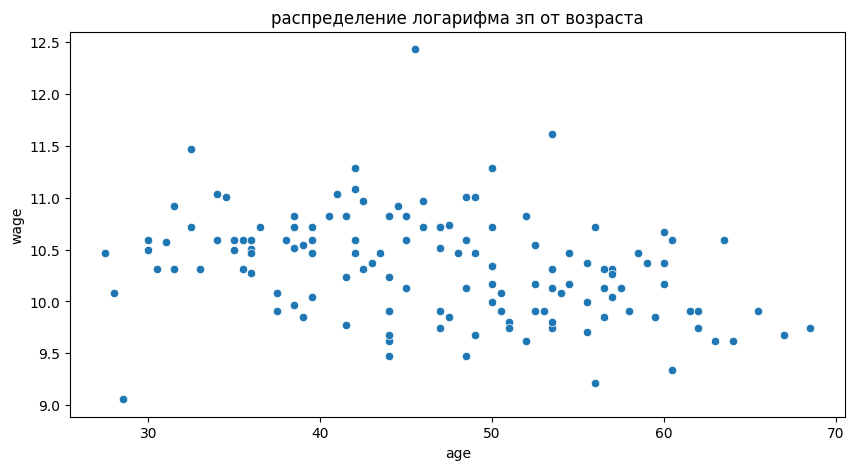

In [851]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(y = np.log(y), x = X['age'], ax=ax).set(title='распределение логарифма зп от возраста')

Попробуем предположить что зп зависит от молодого, среднего и пенисонного возрастов и сделаем дамми переменные.

In [852]:
X['young'] = (X['age'] < 38).astype(int)

X['middle'] = ((X['age'] >= 38) & (X['age'] < 55)).astype(int)

X['elderly'] = (X['age'] >= 55).astype(int)
X

,constant,age,female,smoke,high,young,middle,elderly
0,1,40.5,1,0,1,0,1,0
1,1,42.5,1,0,0,0,1,0
2,1,62.0,0,1,0,0,0,1
3,1,35.0,1,0,0,1,0,0
4,1,64.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
131,1,37.5,1,1,0,1,0,0
132,1,49.0,0,1,0,0,1,0
133,1,42.5,1,0,0,0,1,0
134,1,55.5,1,0,0,0,0,1


Проверяем гипотезу о значимости т-тестом

In [853]:
mymodel = sm.OLS(np.log(y), X).fit()
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     4.839
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           0.000173
Time:                        19:09:55   Log-Likelihood:                -84.402
No. Observations:                 136   AIC:                             182.8
Df Residuals:                     129   BIC:                             203.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       8.4540      0.352     24.013      0.0

Получили $R^2_{adj}$ даже выше, чем в исходной модели из пункта 2

$\textbf{14. (7 баллов)}$ Выпишите итоговую оценку модели на основании результатов тестирования в предыдущих пунктах. Обсудите, какие еще потенциальные эконометрические проблемы могут быть в этой модели. Как бы вы их стали решать? 

In [865]:
finalmodel = sm.OLS(np.log(y), X.drop(['smoke', 'high'], axis=1)).fit()
print(finalmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     6.669
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           6.45e-05
Time:                        19:25:55   Log-Likelihood:                -85.603
No. Observations:                 136   AIC:                             181.2
Df Residuals:                     131   BIC:                             195.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       8.5290      0.334     25.512      0.0